# **Assignment 2**

**Make sure to run this code from top to bottom**

Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from statistics import stdev

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download the datasets, then merge for OLS models

In [17]:
#download CPI data from Google Drive
cpiurl='https://drive.google.com/file/d/1y-niTRT_UnafvHcnyTR2voWkZKkqWlGF/view?usp=sharing'
cpi_id=cpiurl.split('/')[-2]
dwnld_cpi='https://drive.google.com/uc?id=' + cpi_id
cpiraw = pd.read_csv(dwnld_cpi)
#take log of CPIAUCSL
cpiraw['logCPI'] = np.log(cpiraw['CPIAUCSL'])
#use .diff() to get log difference
cpiraw['logCPIdiff'] = np.log(cpiraw['CPIAUCSL']).diff(12)
cpiraw['inflation_estimation'] = cpiraw['logCPIdiff']*100
cpiraw.dropna(subset = ['logCPIdiff', 'inflation_estimation'], inplace=True)
#make sure the dataframe is the same length as others, replace index=0 (NaN) with 0
#cpiraw['logCPIdiff'] = cpiraw[~np.isnan('logCPIdiff')]
#check dataframe, make sure everything looks right
#pd.DataFrame.head(cpiraw, n=13)

,DATE,CPIAUCSL,logCPI,logCPIdiff,inflation_estimation
12,1995-01-01,150.5,5.013963,0.028304,2.830378
13,1995-02-01,150.9,5.016617,0.028228,2.822768
14,1995-03-01,151.2,5.018603,0.027491,2.749084
15,1995-04-01,151.8,5.022564,0.030772,3.077166
16,1995-05-01,152.1,5.024538,0.030710,3.071002
17,1995-06-01,152.4,5.026509,0.029972,2.997227
18,1995-07-01,152.6,5.027820,0.027909,2.790879
19,1995-08-01,152.9,5.029784,0.025838,2.583781
20,1995-09-01,153.1,5.031091,0.025134,2.513360
21,1995-10-01,153.5,5.033701,0.027073,2.707329


In [18]:
#download Unemployement Rate data from Google Drive
unrateurl='https://drive.google.com/file/d/1Q8PALSgfrsZopQ3V_V9cEh6Imp6O2FjW/view?usp=sharing'
unrate_id=unrateurl.split('/')[-2]
dwnld_unrate='https://drive.google.com/uc?id=' + unrate_id
unrateraw = pd.read_csv(dwnld_unrate)
#check dataframe, make sure everything looks right
#pd.DataFrame.head(unrateraw, n=10)

In [19]:
#join dataframes to get all of the CPI rows and the Unemployment rate in the
#same frame
#merge data on similar column, date
cpiunrate = pd.merge(cpiraw, unrateraw, on='DATE')
#check dataframe, make sure everything looks right
#pd.DataFrame.head(cpiunrate, n=10)

,DATE,CPIAUCSL,logCPI,logCPIdiff,inflation_estimation,UNRATE
0,1995-01-01,150.5,5.013963,0.028304,2.830378,5.6
1,1995-02-01,150.9,5.016617,0.028228,2.822768,5.4
2,1995-03-01,151.2,5.018603,0.027491,2.749084,5.4
3,1995-04-01,151.8,5.022564,0.030772,3.077166,5.8
4,1995-05-01,152.1,5.024538,0.030710,3.071002,5.6
5,1995-06-01,152.4,5.026509,0.029972,2.997227,5.6
6,1995-07-01,152.6,5.027820,0.027909,2.790879,5.7
7,1995-08-01,152.9,5.029784,0.025838,2.583781,5.7
8,1995-09-01,153.1,5.031091,0.025134,2.513360,5.6
9,1995-10-01,153.5,5.033701,0.027073,2.707329,5.5


Make scatter plot before running OLS models

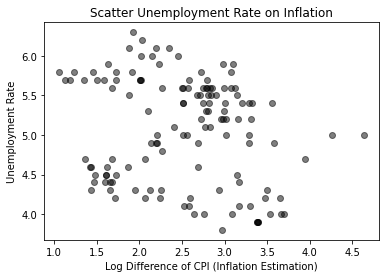

In [20]:
#create scatter plot, logCPIdiff on x and UNRATE on y
plt.scatter(cpiunrate['inflation_estimation'], cpiunrate['UNRATE'], alpha=0.5, c='k')
plt.xlabel('Log Difference of CPI (Inflation Estimation)')
plt.ylabel('Unemployment Rate')
plt.title('Scatter Unemployment Rate on Inflation')
plt.show()

Run OLS model using Statsmodels

In [24]:
#run OLS regression to compute alpha and beta
X = cpiunrate['inflation_estimation']
#add constant column to make sure we get an alpha estimate/std error
X = sm.add_constant(X)
Y = cpiunrate['UNRATE']
philipsmodel = sm.OLS(Y, X)
philipsresult = philipsmodel.fit()
#print summary stats
print(philipsresult.summary())

#I'm sorry for the extra error message, I'm not sure how to get rid of this
#print coefficients
print('The coefficient estimate for alpha is:',round(philipsresult.params[0],4),', and the standard error estimate for alpha is: ',round(philipsresult.bse[0],4))
print('The coefficient estimate for beta is:',round(philipsresult.params[1],4),', and the standard error estimate for beta is: ',round(philipsresult.bse[1],4))

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.402
Date:                Tue, 15 Feb 2022   Prob (F-statistic):             0.0217
Time:                        21:05:07   Log-Likelihood:                -130.70
No. Observations:                 133   AIC:                             265.4
Df Residuals:                     131   BIC:                             271.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5298 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Bootstrap the model using 100 and 300 replications respectively

In [22]:
#bootstrap model, for 100 and 300 replications

#100 replications
#set some parameters
xforstack = cpiunrate['inflation_estimation']
yforstack = cpiunrate['UNRATE']

#set some datasets for for loop
temp=np.transpose(np.stack((yforstack,xforstack,)))
firstrun=pd.DataFrame(temp, columns=['yforstack','xforstack'])

#set some empty arrays
alpha100=[]
beta100=[]
K1=100
#for loop to run bootstrap (100 replications)
for i in range(K1):
  boot1 = resample(firstrun, replace=True, n_samples=144)
  reg1 = smf.ols('yforstack ~ xforstack', data=boot1).fit()
  alpha100.append(reg1.params[0])
  beta100.append(reg1.params[1])
#report standard errors from bootstap (100 replications)
alpha1 = stdev(alpha100)
beta1 = stdev(beta100)
print('Bootstrap standard errors from 100 replications are: ')
print(round(alpha1,4))
print(round(beta1,4))

#set some empty arrays
alpha300=[]
beta300=[]
K3=300
#for loop to run bootstrap (300 replications)
for i in range(K3):
  boot3 = resample(firstrun, replace=True, n_samples=144)
  reg3 = smf.ols('yforstack ~ xforstack', data=boot3).fit()
  alpha300.append(reg3.params[0])
  beta300.append(reg3.params[1])
#report standard errors from bootstap (300 replications)
alpha3 = stdev(alpha300)
beta3 = stdev(beta300)
print('Bootstrap standard errors from 300 replications are: ')
print(round(alpha3,4))
print(round(beta3,4))

Bootstrap standard errors from 100 replications are: 
0.1898
0.0741
Bootstrap standard errors from 300 replications are: 
0.1956
0.0731


Report the differences in standard errors for each model for alpha and beta

In [23]:
#compare standard error outputs from OLS, 100 replication, and 300 replication bootstrap models

#OLS from bootstrap alphas
olsfromboot1alpha = round(philipsresult.bse[0],4)-round(alpha1,4)
olsfromboot3alpha = round(philipsresult.bse[0],4)-round(alpha3,4)
boot1fromboot3alpha = round(alpha1,4) - round(alpha3,4)

#OLS from bootstrap betas
olsfromboot1beta = round(philipsresult.bse[1],4)-round(beta1,4)
olsfromboot3beta = round(philipsresult.bse[1],4)-round(beta3,4)
boot1fromboot3beta = round(beta1,4) - round(beta3,4)

print('Alphas:')
print('The difference between the OLS model alpha standard error and a bootstrap model with 100 replications is: ',round(olsfromboot1alpha,4))
print('The difference between the OLS model alpha standard error and a bootstrap model with 300 replications is: ',round(olsfromboot3alpha,4))
print('The difference between the bootstrap model with 100 replications alpha standard error and a bootstrap model with 300 replications is: ',round(boot1fromboot3alpha,4))
print('Betas:')
print('The difference between the OLS model beta standard error and a bootstrap model with 100 replications is: ',round(olsfromboot1beta,4))
print('The difference between the OLS model beta standard error and a bootstrap model with 300 replications is: ',round(olsfromboot3beta,4))
print('The difference between the bootstrap model with 100 replications beta standard error and a bootstrap model with 300 replications is: ',round(boot1fromboot3beta,4))

Alphas:
The difference between the OLS model alpha standard error and a bootstrap model with 100 replications is:  0.0172
The difference between the OLS model alpha standard error and a bootstrap model with 300 replications is:  0.0114
The difference between the bootstrap model with 100 replications alpha standard error and a bootstrap model with 300 replications is:  -0.0058
Betas:
The difference between the OLS model beta standard error and a bootstrap model with 100 replications is:  0.005
The difference between the OLS model beta standard error and a bootstrap model with 300 replications is:  0.006
The difference between the bootstrap model with 100 replications beta standard error and a bootstrap model with 300 replications is:  0.001
